In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [2]:
category = pd.read_csv('/kaggle/input/dataset34/Category.csv')
favorite_location = pd.read_csv('/kaggle/input/dataset34/FavoriteLocation.csv')
favorite_product = pd.read_csv('/kaggle/input/dataset34/FavoriteProduct.csv')
items = pd.read_csv('/kaggle/input/dataset34/Items.csv')
product = pd.read_csv('/kaggle/input/dataset34/Product.csv')
user = pd.read_csv('/kaggle/input/dataset34/User.csv')

In [3]:
print("Category Info:")
print(category.info())
print('\n')
print("Favorite Location Info:")
print(favorite_location.info())
print('\n')
print("Favorite Product Info:")
print(favorite_product.info())
print('\n')
print("Items Info:")
print(items.info())
print('\n')
print("Product Info:")
print(product.info())
print('\n')
print("User Info:")
print(user.info())

Category Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                20000 non-null  int64 
 1   created_at        20000 non-null  object
 2   updated_at        20000 non-null  object
 3   name              20000 non-null  object
 4   background_color  20000 non-null  object
dtypes: int64(1), object(4)
memory usage: 781.4+ KB
None


Favorite Location Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          150000 non-null  int64 
 1   created_at  150000 non-null  object
 2   updated_at  150000 non-null  object
 3   label       150000 non-null  object
 4   note        150000 non-null  object
 5   location    150000 non-null  object
 6   user        150000 non-null  

## merge the dataset product to items on id

In [4]:
df_info = product.merge(items , on = 'id')
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                100000 non-null  int64  
 1   created_at_x      100000 non-null  object 
 2   updated_at_x      100000 non-null  object 
 3   is_purchased      100000 non-null  int64  
 4   quantity          100000 non-null  int64  
 5   bill              0 non-null       float64
 6   unit              100000 non-null  object 
 7   brand_name        100000 non-null  object 
 8   location          100000 non-null  object 
 9   note              100000 non-null  object 
 10  product           100000 non-null  int64  
 11  added_by          100000 non-null  int64  
 12  created_at_y      100000 non-null  object 
 13  updated_at_y      100000 non-null  object 
 14  name              100000 non-null  object 
 15  background_color  100000 non-null  object 
dtypes: float64(1), int64(

## convert the 'created_at','updated_at','date_joined' column to datetime format

In [5]:
category['created_at']=pd.to_datetime(category['created_at'])
category['updated_at']=pd.to_datetime(category['updated_at'])

favorite_location['created_at']=pd.to_datetime(favorite_location['created_at'])
favorite_location['updated_at']=pd.to_datetime(favorite_location['updated_at'])

favorite_product['created_at']=pd.to_datetime(favorite_product['created_at'])
favorite_product['updated_at']=pd.to_datetime(favorite_product['updated_at'])

items['created_at']=pd.to_datetime(items['created_at'])
items['updated_at']=pd.to_datetime(items['updated_at'])

product['created_at']=pd.to_datetime(product['created_at'])
product['updated_at']=pd.to_datetime(product['updated_at'])

user['date_joined']=pd.to_datetime(user['date_joined'])

In [6]:
product.drop(columns=['bill'],inplace=True)

In [7]:
user[user['last_login'].isna()==False]

,id,last_login,username,email,date_joined
22402,1,2024-01-22 13:25:22,7434989610,dipesh@gmail.com,2024-01-22 13:23:00


In [8]:
user=user.drop(columns=['last_login'])

In [9]:
dfs = [category, favorite_location, favorite_product, items, product, user]
c=0
for df in dfs:
    c+=1
    print(f"{c}. ----------------------------------------------------\n")
    for column_name in df.columns:
        num_unique_values = df[column_name].nunique()
        num_total_values = len(df[column_name])
        print(f"Column: {column_name}")
        print(f"Number of unique values: {num_unique_values}")
        print(f"Total number of values: {num_total_values}")
        if num_unique_values / num_total_values < 0.05:
            print(f"{column_name} might be a categorical variable.")
        else:
            print(f"{column_name} is likely not a categorical variable.")
        print()


1. ----------------------------------------------------

Column: id
Number of unique values: 20000
Total number of values: 20000
id is likely not a categorical variable.

Column: created_at
Number of unique values: 649
Total number of values: 20000
created_at might be a categorical variable.

Column: updated_at
Number of unique values: 649
Total number of values: 20000
updated_at might be a categorical variable.

Column: name
Number of unique values: 971
Total number of values: 20000
name might be a categorical variable.

Column: background_color
Number of unique values: 1
Total number of values: 20000
background_color might be a categorical variable.

2. ----------------------------------------------------

Column: id
Number of unique values: 150000
Total number of values: 150000
id is likely not a categorical variable.

Column: created_at
Number of unique values: 1106
Total number of values: 150000
created_at might be a categorical variable.

Column: updated_at
Number of unique value

## drop the column

In [10]:
category = category.drop(columns=['background_color'])
items = items.drop(columns=['background_color'])

In [11]:
product['unit'].unique()

array(['KG', 'GM', 'Dozen', 'Piece'], dtype=object)

In [12]:
le = LabelEncoder()
product['unit'] = le.fit_transform(product['unit'])

In [13]:
product['unit'].unique()

array([2, 1, 0, 3])

In [14]:
# Calculate the number of ratings per user and per product
user_counts = favorite_product['user'].value_counts()
product_counts = favorite_product['favorite_product'].value_counts()

# Calculate min, max, avg, median for users
user_min = user_counts.min()
user_max = user_counts.max()
user_avg = user_counts.mean()
user_median = user_counts.median()

# Calculate min, max, avg, median for products
product_min = product_counts.min()
product_max = product_counts.max()
product_avg = product_counts.mean()
product_median = product_counts.median()

print(f"Users:\nMin: {user_min}, Max: {user_max}, Avg: {user_avg}, Median: {user_median}")
print(f"Products:\nMin: {product_min}, Max: {product_max}, Avg: {product_avg}, Median: {product_median}")

Users:
Min: 1, Max: 14, Avg: 4.515488124266233, Median: 4.0
Products:
Min: 1, Max: 7, Avg: 1.5823035174607194, Median: 1.0


<Axes: ylabel='Density'>

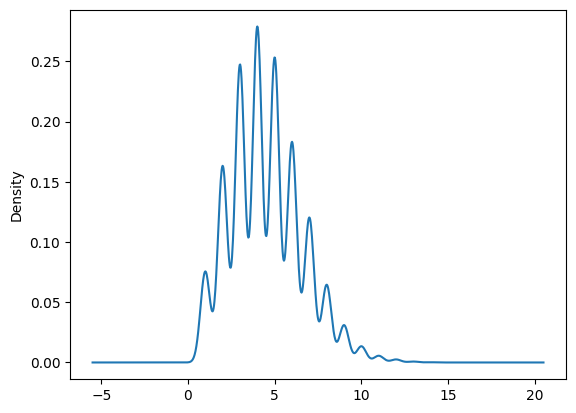

In [15]:
user_counts.plot(kind='kde')

<Axes: ylabel='Density'>

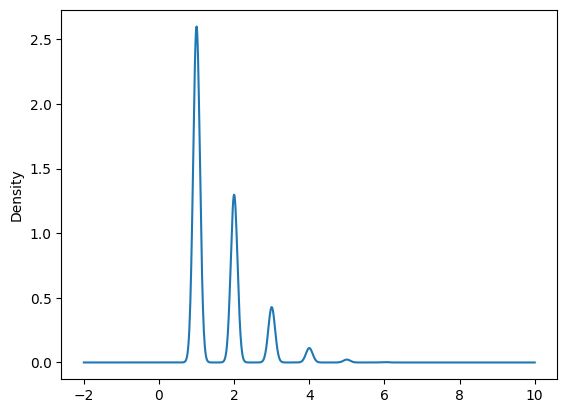

In [16]:
product_counts.plot(kind='kde')

In [17]:
# Define a threshold for the minimum number of ratings
user_threshold = 3
product_threshold = 2

# Filter out users with fewer than 'user_threshold' ratings
user_counts = favorite_product['user'].value_counts()
active_users = user_counts[user_counts >= user_threshold].index
filtered_favorite_product = favorite_product[favorite_product['user'].isin(active_users)]

# Filter out products with fewer than 'product_threshold' ratings
product_counts = favorite_product['favorite_product'].value_counts()
popular_products = product_counts[product_counts >= product_threshold].index
filtered_favorite_product = filtered_favorite_product[filtered_favorite_product['favorite_product'].isin(popular_products)]

In [18]:
print(filtered_favorite_product.shape,favorite_product.shape)

(59296, 5) (100000, 5)


In [19]:
filtered_favorite_product.sample(5)

,id,created_at,updated_at,user,favorite_product
28410,71590,2024-01-23 10:35:06,2024-01-23 10:35:06,15074,76097
51310,48690,2024-01-23 10:31:25,2024-01-23 10:31:25,1642,66100
80550,19450,2024-01-23 10:27:50,2024-01-23 10:27:50,17435,88291
13357,86643,2024-01-23 10:37:29,2024-01-23 10:37:29,17475,76442
66079,33921,2024-01-23 10:29:14,2024-01-23 10:29:14,14481,57393


# Building Collaborative Recommender System

In [20]:
def collaborative_filtering(user_id, df,n):
    # Ensure that 'user' and 'favorite_product' columns are numeric
    df['user'] = pd.to_numeric(df['user'], errors='coerce')
    df['favorite_product'] = pd.to_numeric(df['favorite_product'], errors='coerce')

    # Drop any rows that contain non-numeric data
    df = df.dropna(subset=['user', 'favorite_product'])

    # Create a pivot table with users as rows and products as columns
    pivot_table = df.pivot(index='user', columns='favorite_product', values='favorite_product')
    pivot_table = pivot_table.fillna(0)

    # Convert the DataFrame to a sparse matrix
    sparse_matrix = csr_matrix(pivot_table.values)

    # Fit the nearest neighbors model
    model_knn = NearestNeighbors(metric='cosine', n_neighbors=3, n_jobs=-1)
    model_knn.fit(sparse_matrix)

    # Get the top N similar users to the target user
    distances, indices = model_knn.kneighbors(sparse_matrix[user_id].reshape(1, -1), n_neighbors=n+1)
    similar_users = [pivot_table.index[i] for i in indices.flatten()[1:]]

    # Get the products favorited by similar users
    similar_users_products = df[df['user'].isin(similar_users)]['favorite_product']

    top_n_products = similar_users_products.value_counts().index[:n]

    return top_n_products

In [21]:
# Assume favorite_product is your FavoriteProduct.csv DataFrame
user_id = int(input('Enter the user id :'))  # Replace with the actual user_id
n_recommendations = int(input('Enter the recommendation number :'))  # Number of recommendations to make

recommendations = collaborative_filtering(user_id, filtered_favorite_product,n_recommendations)

recommended_products_details = filtered_favorite_product[filtered_favorite_product['favorite_product'].isin(recommendations)]

# Merge 'recommended_products_details' with 'product_info' on 'favorite_product'
recommended_products_details = pd.merge(recommended_products_details, df_info, left_on='favorite_product', right_on='id', how='left')

recommended_products_details = recommended_products_details.drop_duplicates(subset=['favorite_product'])

# Display the names of the recommended products
recommended_products_details[['id_x','favorite_product','user','name','note']]

Enter the user id : 5442
Enter the recommendation number : 5


,id_x,favorite_product,user,name,note
0,99618,71003,14913,trip,Window state culture page enough word herself....
1,93516,96355,15206,interview,Such school anything sometimes author wind. Ar...
2,90240,73137,14913,until,Necessary stuff technology marriage author ove...
3,89914,41944,10289,seem,Ready them remain message analysis peace with....
4,89819,76355,6684,view,Bar travel stock believe ready society. Your f...
